# CST731
## Due to the large amount of data generated by a world sized excel sheet containing various forms of data for covid, I had to turn to Jupyter Notebook to process it. 


In [27]:
#author - Jason Matthew Green
#university - North Carolina Agricultural and Technical University 
# Professor - Li-Shang Tsay 
# Class - CST731
#
# This python environment is built off of Anaconda's Jupyter Notebook Anaconda Individual Edition 2021.11 includes a new release of Anaconda Navigator - version 2.1. 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("covid-variants.csv")

## =========================================================================

## DATA PREPROCESSING

### We will largely be using pandas to process the data

### Resources Used
### https://www.bmc.com/blogs/installing-jupyter-for-big-data-and-analytics/ 
### https://towardsdatascience.com/data-analysis-and-visualization-with-jupyter-notebook-22f6dcd25cc5 

In [9]:
df.head()

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3


In [11]:
df.nunique()

location                121
date                     45
variant                  24
num_sequences          1563
perc_sequences         3600
num_sequences_total    1247
dtype: int64

### Above is gaining total numbers of each: 
### location =  Country
### num_sequences	: This is the number of sequiences detected by week.
### perc_sequences :This is the number of new cases detected in num_sequences as a percentage. 
### num_sequences_total : total number of a sequence

#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### Now to trim the data

In [12]:
df["variant"].unique()

array(['Alpha', 'B.1.1.277', 'B.1.1.302', 'B.1.1.519', 'B.1.160',
       'B.1.177', 'B.1.221', 'B.1.258', 'B.1.367', 'B.1.620', 'Beta',
       'Delta', 'Epsilon', 'Eta', 'Gamma', 'Iota', 'Kappa', 'Lambda',
       'Mu', 'Omicron', 'S:677H.Robin1', 'S:677P.Pelican', 'others',
       'non_who'], dtype=object)

In [13]:
df["location"].unique()

array(['Angola', 'Argentina', 'Aruba', 'Australia', 'Austria', 'Bahrain',
       'Bangladesh', 'Belgium', 'Belize', 'Benin',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Cambodia', 'Cameroon', 'Canada', 'Chile', 'Colombia',
       'Costa Rica', 'Croatia', 'Curacao', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Guatemala', 'Hong Kong', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan',
       'Kenya', 'Kosovo', 'Kuwait', 'Latvia', 'Lebanon', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia',
       'Maldives', 'Malta', 'Mauritius', 'Mexico', 'Moldova', 'Monaco',
       'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Nepal',
       'Netherlands', 'New

In [14]:
df.duplicated().sum()

0

In [15]:
df.describe()

,num_sequences,perc_sequences,num_sequences_total
count,100416.000000,100416.000000,100416.000000
mean,72.171676,6.154355,1509.582457
std,1669.262169,21.898989,8445.291772
min,0.000000,-0.010000,1.000000
25%,0.000000,0.000000,12.000000
50%,0.000000,0.000000,59.000000
75%,0.000000,0.000000,394.000000
max,142280.000000,100.000000,146170.000000


In [17]:
df["num_sequences"].max()

142280

In [18]:
df["num_sequences"].min()

0

In [19]:
df.replace(0,np.nan,inplace=True)
df.dropna(inplace=True)
df=df.reset_index(drop=True, inplace=False)
df

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,others,3.0,100.0,3
1,Angola,2020-07-06,non_who,3.0,100.0,3
2,Angola,2020-08-31,Beta,1.0,100.0,1
3,Angola,2020-09-28,Beta,9.0,90.0,10
4,Angola,2020-09-28,others,1.0,10.0,10
...,...,...,...,...,...,...
16102,Zimbabwe,2021-09-06,Delta,14.0,100.0,14
16103,Zimbabwe,2021-09-20,Delta,6.0,100.0,6
16104,Zimbabwe,2021-10-04,Delta,2.0,100.0,2
16105,Zimbabwe,2021-10-18,Delta,5.0,100.0,5


In [20]:
df['month'] = pd.DatetimeIndex(df['date']).month
df['month']

0         7
1         7
2         8
3         9
4         9
         ..
16102     9
16103     9
16104    10
16105    10
16106    11
Name: month, Length: 16107, dtype: int64

In [22]:
df=df[df["variant"]!="non_who"]

In [23]:
omicron=df[df["variant"]=="Omicron"]
delta=df[df["variant"]=="Delta"]
others=df[(df["variant"]!="Omicron") & (df["variant"]!="Delta")]

In [30]:
df.dtypes

location                object
date                    object
variant                 object
num_sequences          float64
perc_sequences         float64
num_sequences_total      int64
month                    int64
dtype: object

## Data Processing
## Looking At Data: Variants vs Each Other in Different Locations  
## =========================================================================

# World

In [25]:
omicron_world=omicron.groupby("date").sum()
omicron_world['date']=omicron_world.index
delta_world=delta.groupby("date").sum()
delta_world["date"]=delta_world.index
others_world=others.groupby("date").sum()
others_world["date"]=others_world.index

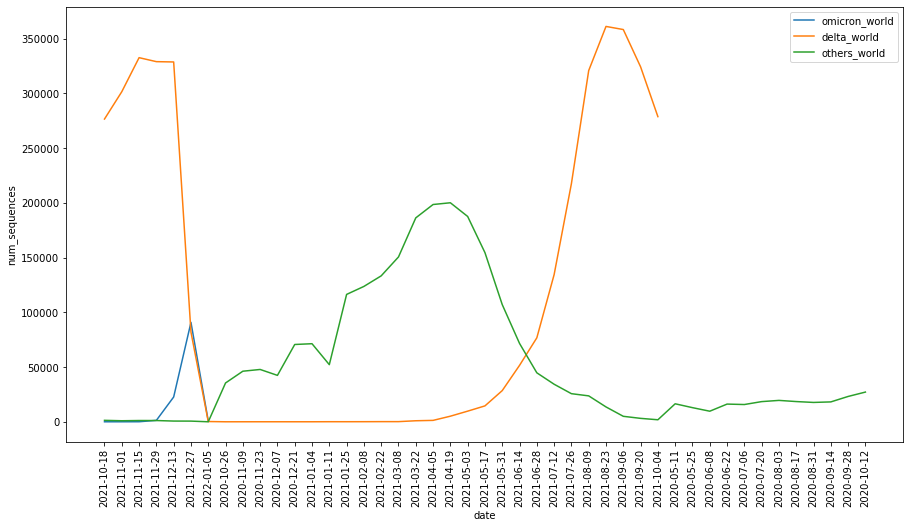

In [26]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.lineplot(x=omicron_world['date'],y=omicron_world['num_sequences'],label="omicron_world")
sns.lineplot(x=delta_world['date'], y=delta_world['num_sequences'],label="delta_world")
sns.lineplot(x=others_world['date'], y=others_world['num_sequences'],label="others_world")
plt.show()

# =============================================================
# United States

In [31]:
omicron_US=omicron[omicron["location"]=="United States"]
delta_US=delta[delta["location"]=="United States"]
others_US=others[others['location']=="United States"]
others_group2=others_US.groupby("date").sum()
others_group2["date"]=others_group2.index 

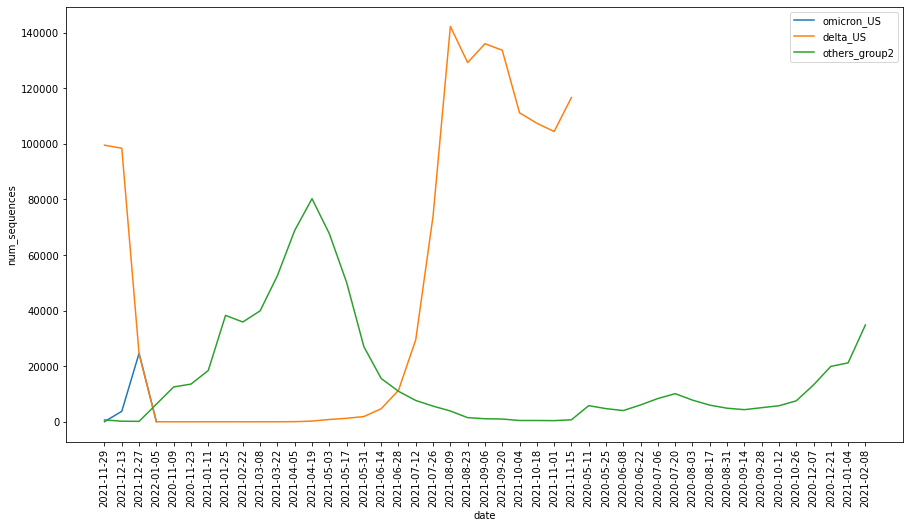

In [32]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.lineplot(x=omicron_US['date'],y=omicron_US['num_sequences'],label="omicron_US")
sns.lineplot(x=delta_US['date'],y=delta_US['num_sequences'],label="delta_US")
sns.lineplot(x=others_group2['date'],y=others_group2['num_sequences'],label="others_group2")
plt.show()

# Omicron In The World vs USA

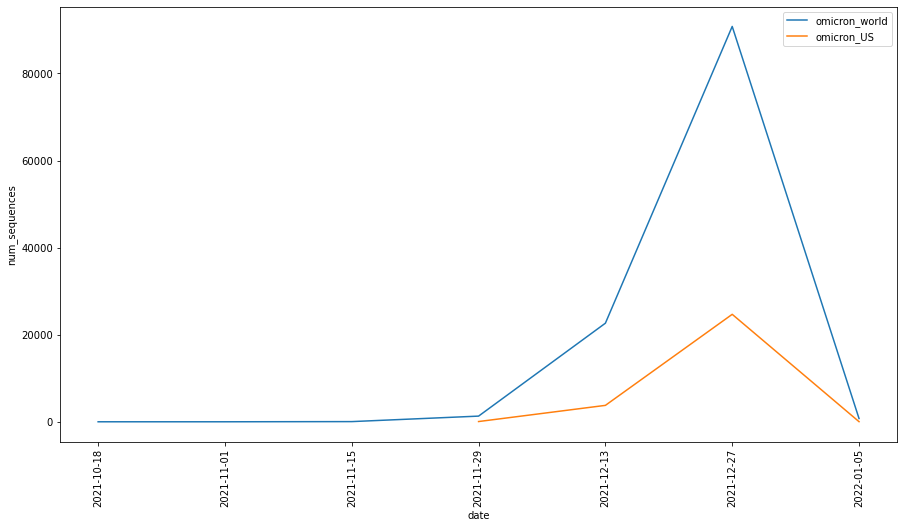

In [33]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.lineplot(x=omicron_world['date'], y=omicron_world['num_sequences'],label="omicron_world")
sns.lineplot(x=omicron_US['date'], y=omicron_US['num_sequences'],label="omicron_US")
plt.show()

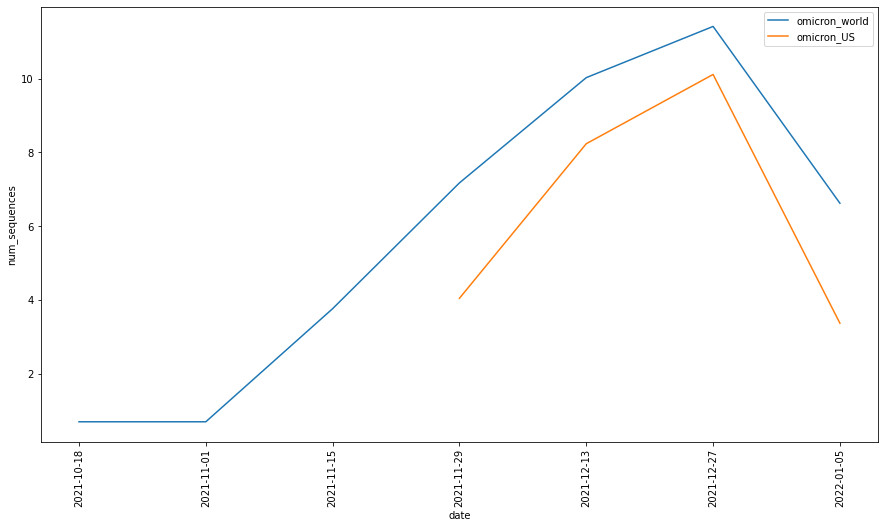

In [34]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.lineplot(x=omicron_world['date'], y=np.log1p(omicron_world['num_sequences']),label="omicron_world")
sns.lineplot(x=omicron_US['date'], y=np.log1p(omicron_US['num_sequences']),label="omicron_US")
plt.show()